In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Data Collect

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking


In [2]:
data = pd.read_csv("customer_booking.csv",encoding="ISO-8859-1")
data

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0                7        Sat  AKLDEL    New Zealand                    1   
1                3        Sat  AKLDEL    New Zealand                    0   
2               17        Wed  AKLDEL          India                    1   
3                4        Sat  AKLDEL    New Zealand                    0   
4               15        Wed  AKLDEL          India                    1   
...            ...        ...     ...            ...                  ...   
49995            9        Sat  PERPNH      Australia                    1   
49996            4        Sun  PERPNH      Australia                    0   
49997           22        Sat  PERPNH      Australia                    0   
49998           11        Mon  PERPNH      Australia                    1   
49999           10        Thu  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[50000 rows x 14 columns]

## 2 Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
data.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

booking_complete
0    42522
1     7478
Name: count, dtype: int64


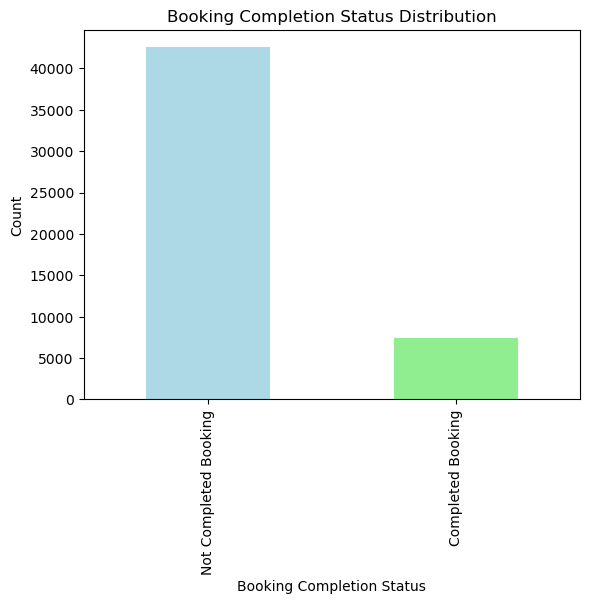

In [5]:
print(data['booking_complete'].value_counts())
data['booking_complete'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.xlabel('Booking Completion Status')
plt.ylabel('Count')
plt.title('Booking Completion Status Distribution')
plt.xticks(ticks=[0, 1], labels=["Not Completed Booking", "Completed Booking"])
plt.show()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


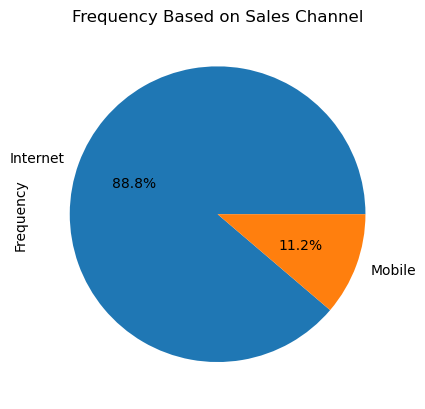

In [6]:
print(data.sales_channel.value_counts())
data.sales_channel.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Frequency Based on Sales Channel")
plt.ylabel("Frequency");

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


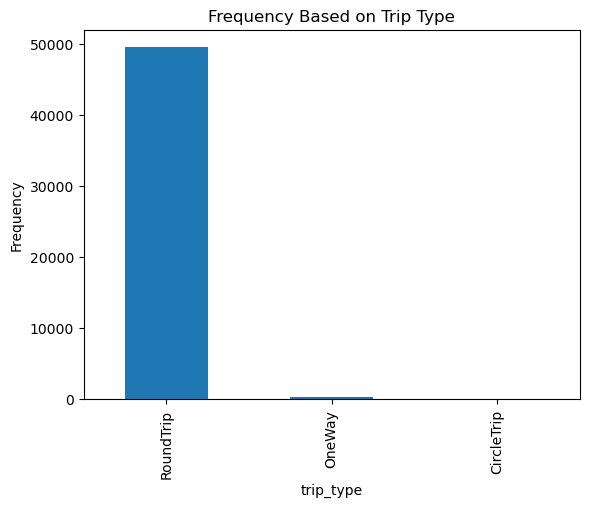

In [7]:
print(data.trip_type.value_counts())
data.trip_type.value_counts().plot(kind='bar')
plt.title("Frequency Based on Trip Type")
plt.ylabel("Frequency");

num_passengers     1     2    3    4   5   6   7   8   9
flight_day                                              
Fri             4398  1617  382  218  66  45  12  13  10
Mon             5032  2124  491  281  79  47  17  19  12
Sat             3565  1544  347  209  84  32  13   8  10
Sun             3850  1828  437  280  94  37  16   7   5
Thu             4721  1850  425  289  64  33  17  15  10
Tue             4931  1879  437  243  94  49  15  11  14
Wed             4855  1962  422  264  80  46  24  16   5


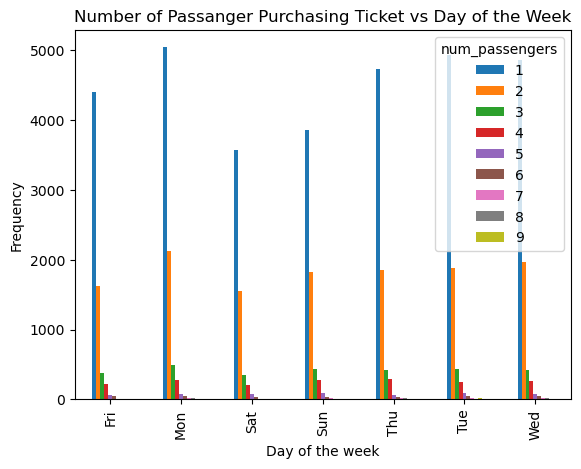

In [8]:
print(pd.crosstab(data.flight_day, data.num_passengers))
pd.crosstab(data.flight_day, data.num_passengers).plot(kind="bar")
plt.title("Number of Passanger Purchasing Ticket vs Day of the Week")
plt.xlabel("Day of the week")
plt.ylabel("Frequency");

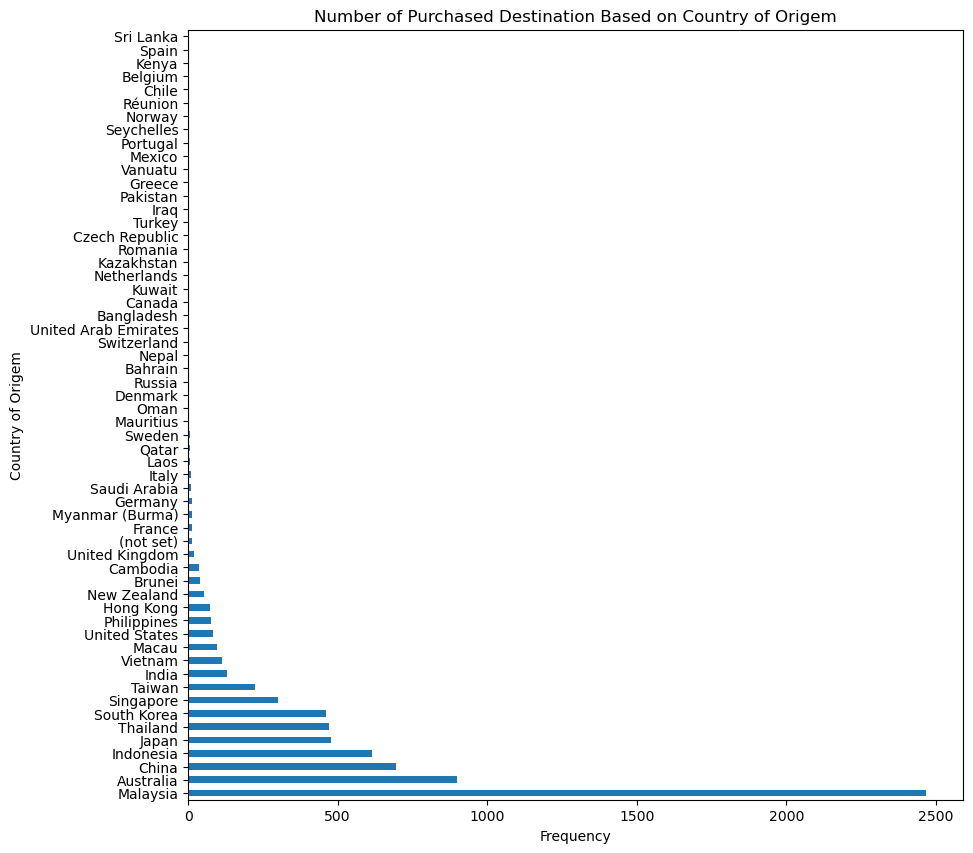

In [9]:
data_destination_booked = data[data['booking_complete']==1]
plt.figure(figsize=(10, 10))
data_destination_booked.booking_origin.value_counts().plot(kind='barh')
plt.ylabel('Country of Origem')
plt.xlabel('Frequency')
plt.title('Number of Purchased Destination Based on Country of Origem');

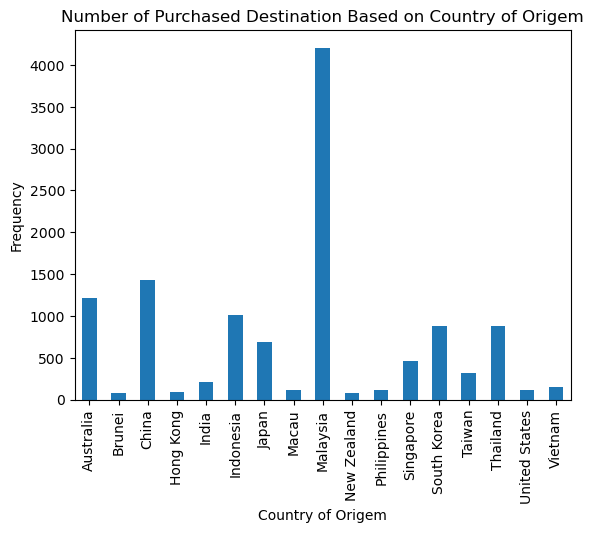

In [10]:
data_destination_booked = data_destination_booked.groupby("booking_origin").sum()
data_destination_booked = data_destination_booked[data_destination_booked['num_passengers'] > 50]
data_destination_booked.num_passengers.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Country of Origem')
plt.title('Number of Purchased Destination Based on Country of Origem');

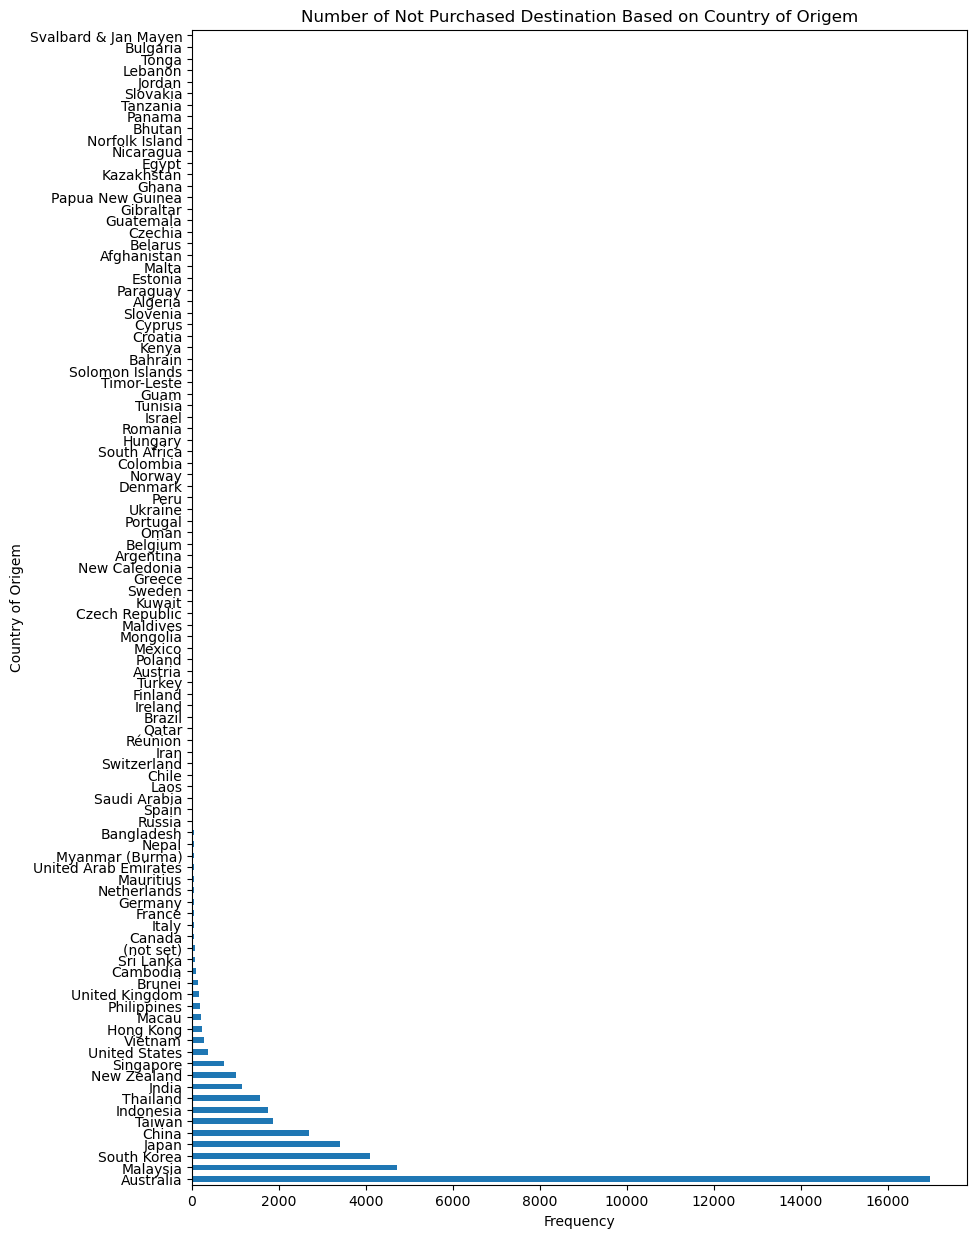

In [11]:
data_destination_not_booked = data[data['booking_complete']==0]
plt.figure(figsize=(10, 15))
data_destination_not_booked.booking_origin.value_counts().plot(kind='barh')
plt.ylabel('Country of Origem')
plt.xlabel('Frequency')
plt.title('Number of Not Purchased Destination Based on Country of Origem');

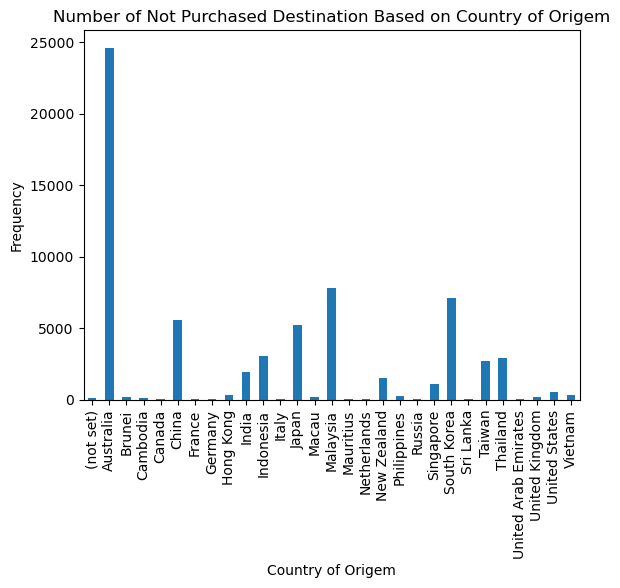

In [12]:
data_destination_not_booked = data_destination_not_booked.groupby("booking_origin").sum()
data_destination_not_booked = data_destination_not_booked[data_destination_not_booked['num_passengers'] > 50]
data_destination_not_booked.num_passengers.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Country of Origem')
plt.title('Number of Not Purchased Destination Based on Country of Origem');

In [13]:
data

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0                7        Sat  AKLDEL    New Zealand                    1   
1                3        Sat  AKLDEL    New Zealand                    0   
2               17        Wed  AKLDEL          India                    1   
3                4        Sat  AKLDEL    New Zealand                    0   
4               15        Wed  AKLDEL          India                    1   
...            ...        ...     ...            ...                  ...   
49995            9        Sat  PERPNH      Australia                    1   
49996            4        Sun  PERPNH      Australia                    0   
49997           22        Sat  PERPNH      Australia                    0   
49998           11        Mon  PERPNH      Australia                    1   
49999           10        Thu  PERPNH      Australia                    0   

       wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                         0                      0             5.52   
1                         0                      0             5.52   
2                         1                      0             5.52   
3                         0                      1             5.52   
4                         0                      1             5.52   
...                     ...                    ...              ...   
49995                     0                      1             5.62   
49996                     0                      0             5.62   
49997                     0                      1             5.62   
49998                     0                      1             5.62   
49999                     1                      0             5.62   

       booking_complete  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
49995                 0  
49996                 0  
49997                 0  
49998                 0  
49999                 0  

[50000 rows x 14 columns]

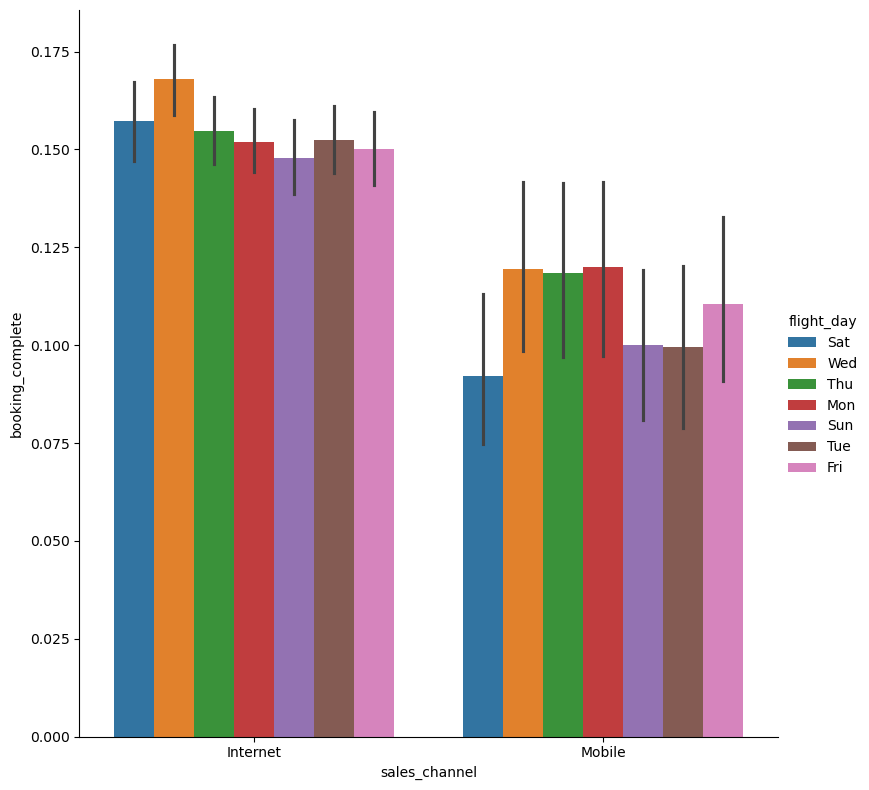

In [14]:
sns.catplot(data=data, kind="bar", x="sales_channel", y="booking_complete", hue="flight_day",height=8);

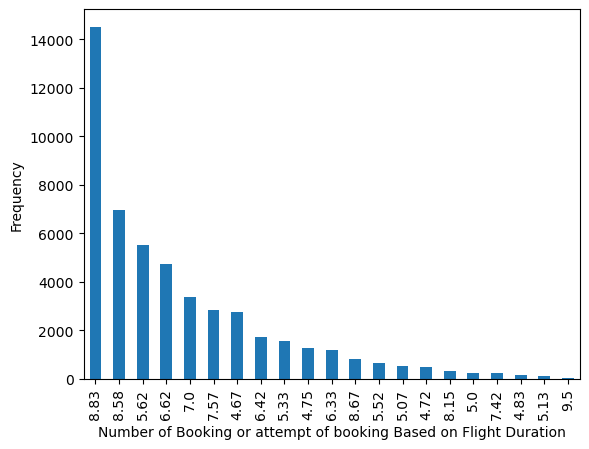

In [15]:
data.flight_duration.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Number of Booking or attempt of booking Based on Flight Duration');

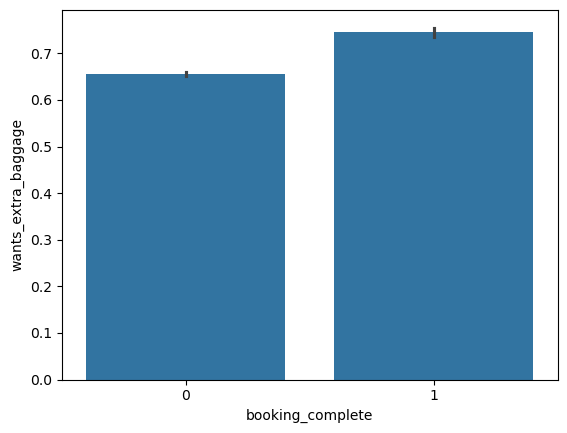

In [16]:
sns.barplot(x = data.booking_complete, y = data.wants_extra_baggage);

## 3 Machine Learning

In [17]:
data_copy = data.copy()

In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [19]:
data_copy.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [20]:
from sklearn.preprocessing import OrdinalEncoder

object_list = ['sales_channel','trip_type','flight_day','route','booking_origin']
ordinalEncoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-99).fit(data_copy[object_list])
data_copy[object_list] = ordinalEncoder.transform(data_copy[object_list])

In [21]:
data_copy.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2            0.0        2.0            262              19   
1               1            0.0        2.0            112              20   
2               2            0.0        2.0            243              22   
3               1            0.0        2.0             96              31   
4               2            0.0        2.0             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7         2.0    0.0            61.0                    1   
1            3         2.0    0.0            61.0                    0   
2           17         6.0    0.0            36.0                    1   
3            4         2.0    0.0            61.0                    0   
4           15         6.0    0.0            36.0                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

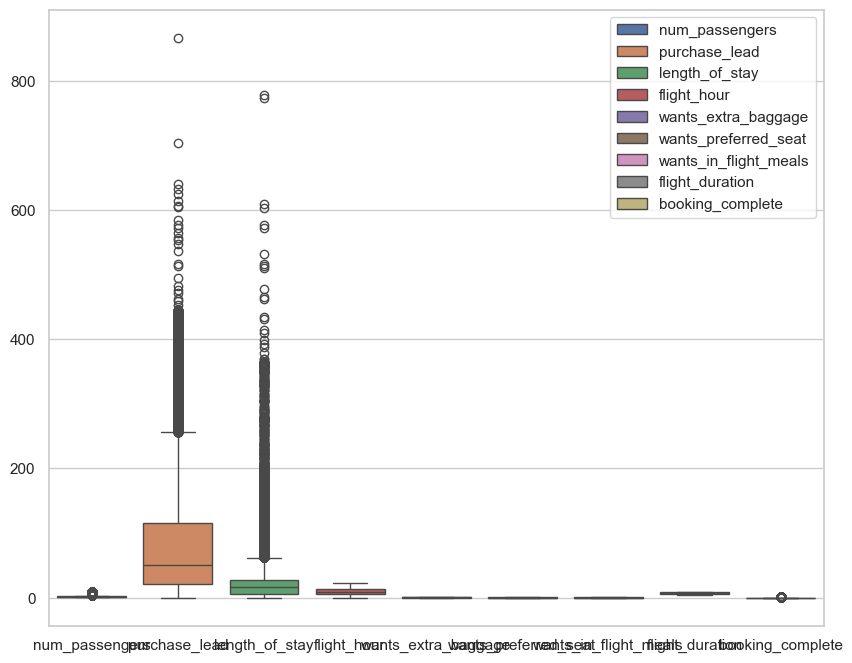

In [22]:
sns.set(style='whitegrid',color_codes=True)
plt.figure(figsize =(10,8))
sns.boxplot(data = data,width=0.8,legend='full');

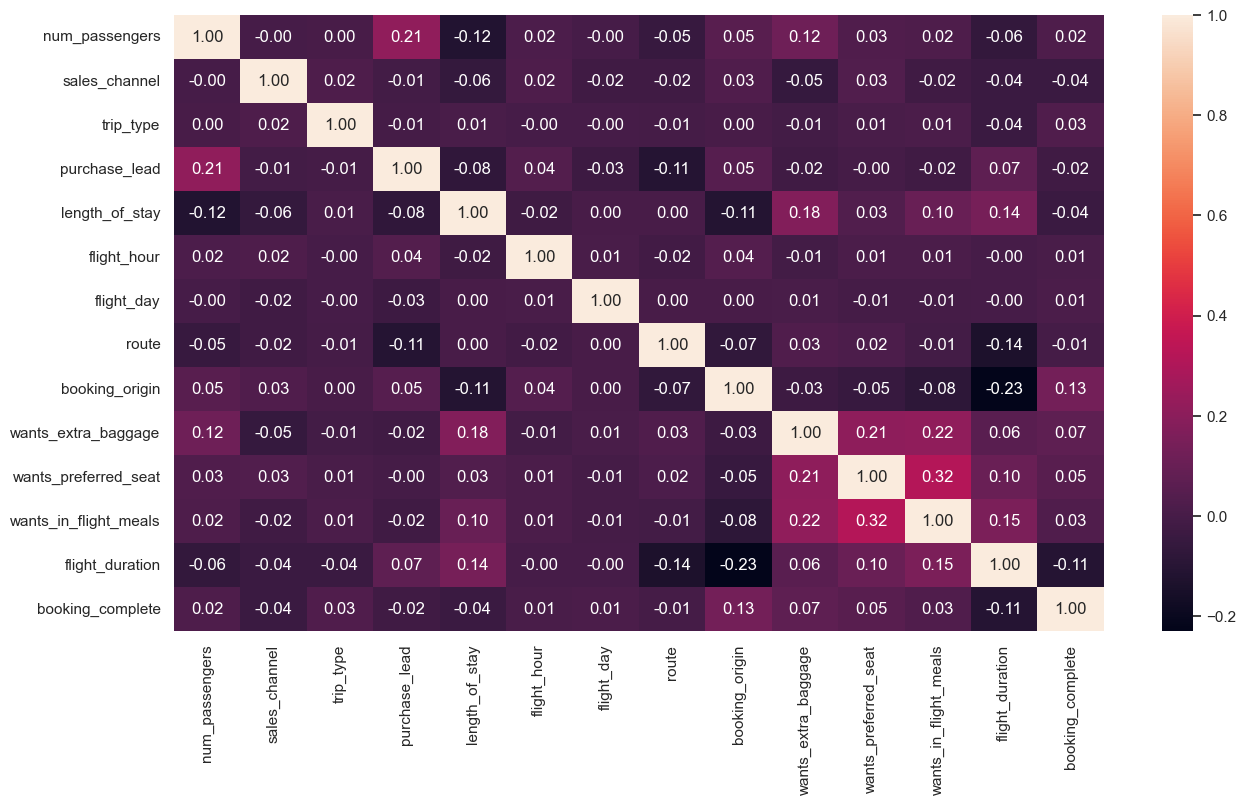

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(data_copy.corr(),annot=True,fmt=".2f");

In [24]:
data_shuffled = data_copy.sample(frac=1).reset_index(drop=True)
data_shuffled.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2            0.0        2.0            340              17   
1               1            0.0        2.0             65              23   
2               4            0.0        2.0             49               5   
3               2            0.0        2.0            229              17   
4               1            0.0        2.0             20              21   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0           22         2.0  716.0             4.0                    1   
1           23         5.0  633.0             4.0                    1   
2            3         0.0  307.0            17.0                    0   
3            7         3.0  310.0             4.0                    0   
4            4         6.0  680.0             4.0                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     1                      0             8.58   
1                     0                      1             8.83   
2                     0                      0             6.42   
3                     0                      0             8.58   
4                     0                      1             8.83   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [25]:
X = data_shuffled.drop('booking_complete',axis=1)
y = data_shuffled['booking_complete']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 13), (15000, 13), (35000,), (15000,))

In [27]:
print(f"y_train: ",y_train.value_counts())
print(f"y_test: ",y_test.value_counts())

y_train:  booking_complete
0    29740
1     5260
Name: count, dtype: int64
y_test:  booking_complete
0    12782
1     2218
Name: count, dtype: int64


In [28]:
#put models in a dictionary
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "KNClassifier": KNeighborsClassifier()}

In [29]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\mvidal1\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 12.4 s
Wall time: 8.13 s


{'Logistic Regression': 0.8520666666666666,
 'KNN': 0.8315333333333333,
 'Random Forest': 0.853,
 'XGBoost': 0.8479333333333333,
 'Gradient Boost Classifier': 0.8526,
 'Decision Tree Classifier': 0.7804,
 'KNClassifier': 0.8315333333333333}

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.3, random_state = 42)

In [32]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

print(model_scores)

{'Logistic Regression': 0.8521333333333333, 'KNN': 0.8284, 'Random Forest': 0.8524666666666667, 'XGBoost': 0.8479333333333333, 'Gradient Boost Classifier': 0.8526, 'Decision Tree Classifier': 0.7798, 'KNClassifier': 0.8284}
CPU times: total: 17.5 s
Wall time: 13.9 s


In [33]:
from sklearn.model_selection import cross_val_score, GridSearchCV

modelRFC = RandomForestClassifier()

parameter_val ={'n_estimators':[100,150],
                'max_depth': [3,5,8]
               }

grid = GridSearchCV(estimator= modelRFC,
                   param_grid= parameter_val,
                   cv=10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8], 'n_estimators': [100, 150]})

In [34]:
grid.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [35]:
modelsRFC_tunned = RandomForestClassifier(max_depth= 8, n_estimators= 150)

In [36]:
modelsRFC_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=150)

In [37]:
modelRFC_predict = modelsRFC_tunned.predict(X_test)
modelRFC_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

table = pd.DataFrame(y_test, modelRFC_predict,columns=['True_values','modelRFC_predict'])
print('Confusion Matrix\n', confusion_matrix(y_test,modelRFC_predict))

print("\n",classification_report(y_test,modelRFC_predict))

print('Accuracy GradientBoostingClassifier: ', np.mean(np.equal(y_test, modelRFC_predict)))

Confusion Matrix
 [[12781     1]
 [ 2218     0]]

               precision    recall  f1-score   support

           0       0.85      1.00      0.92     12782
           1       0.00      0.00      0.00      2218

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000

Accuracy GradientBoostingClassifier:  0.8520666666666666


In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

print(f"Difference between people with Stroke and without Stroke {np.bincount(y)}.\n\n") 

smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X,y)
print(f"Smote creates new lines with similar data to balance the variable with less values. After apply Smote {np.bincount(y_resampled)} the numbers are equal.\n")

Difference between people with Stroke and without Stroke [42522  7478].


Smote creates new lines with similar data to balance the variable with less values. After apply Smote [42522 42522] the numbers are equal.



In [40]:
X_scaler_resampled = scaler.fit_transform(X_resampled)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler_resampled, y_resampled, test_size = 0.3, random_state = 42)

In [42]:
X_train

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01656315],
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.86128364],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.86128364],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.80952381],
       [0.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.80952381],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01656315]])

In [43]:
%%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

print(model_scores)

{'Logistic Regression': 0.6283217057301873, 'KNN': 0.7477071411773928, 'Random Forest': 0.9005252018499648, 'XGBoost': 0.8856314180449949, 'Gradient Boost Classifier': 0.8631339656659089, 'Decision Tree Classifier': 0.8565493454573959, 'KNClassifier': 0.7477071411773928}
CPU times: total: 38 s
Wall time: 33.3 s


In [44]:
modelsRFC_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=150)

In [45]:
modelRFC_Tunned_pred = modelsRFC_tunned.predict(X_test)
modelRFC_Tunned_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [46]:
table = pd.DataFrame(y_test, modelRFC_Tunned_pred,columns=['True_values','modelRFC_Tunned_pred'])
print('Confusion Matrix\n', confusion_matrix(y_test,modelRFC_Tunned_pred))

print("\n",classification_report(y_test,modelRFC_Tunned_pred))

print('Accuracy GradientBoostingClassifier: ', np.mean(np.equal(y_test, modelRFC_Tunned_pred)))

Confusion Matrix
 [[ 8518  4217]
 [ 1943 10836]]

               precision    recall  f1-score   support

           0       0.81      0.67      0.73     12735
           1       0.72      0.85      0.78     12779

    accuracy                           0.76     25514
   macro avg       0.77      0.76      0.76     25514
weighted avg       0.77      0.76      0.76     25514

Accuracy GradientBoostingClassifier:  0.7585639256878577
